[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W2D5_ClimateResponse-AdaptationImpact/W2D5_Tutorial2.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/{ORG}/course-content/main/tutorials/W2D5_ClimateResponse-AdaptationImpact/W2D5_Tutorial2.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# **Tutorial 2:  Regression and Decision Trees on the Dengue Fever Dataset**




**Week 2, Day 5: Adaptation and Impact**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ Dionessa Biton, Younkap Nina Duplex, Sloane Garelick, Zahra Khodakaramimaghsoud, Peter Ohue, Jenna Pearson, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

__Content editors:__ Jenna Pearson, Chi Zhang, Ohad Zivan

__Production editors:__ Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google deepmind

# **Tutorial Objectives**

Welcome to tutorial 2 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial, we will explore a dataset that relates weather variables to dengue fever cases. By the end of the tutorial, you will be able to:

- Load the data into pandas dataframes and visualize it to see obvious trends.
- Apply linear regression to the Dengue dataset: clean the data, implement linear regression using scikit-learn, and evaluate its performance. This will include handling categorical data using dummy variables and using scikit-learn's Poisson GLM method to handle integer-valued data.
- Apply additional methods to the Dengue Fever dataset, including implementing Random Forest Regression, discussing and analyzing its performance, and measuring feature importance.

This tutorial will provide you with practical experience in working with real-world datasets and implementing different regression techniques.




# **Setup**

In [1]:
# imports

import numpy as np  # import the numpy library as np
from sklearn.linear_model import LinearRegression # import the LinearRegression class from the sklearn.linear_model module
import matplotlib.pyplot as plt # import the pyplot module from the matplotlib library
import pandas as pd #import the pandas library and the drive function from the google.colab module
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor

from matplotlib import cm
import pooch
import os
import tempfile

In [2]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")
%matplotlib inline


In [3]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

In [5]:
# helper functions

def pooch_load(filelocation=None,filename=None,processor=None):
    shared_location='/home/jovyan/shared/Data/tutorials/W2D5_ClimateResponse-AdaptationImpact' # this is different for each day
    user_temp_cache=tempfile.gettempdir()
    
    if os.path.exists(os.path.join(shared_location,filename)):
        file = os.path.join(shared_location,filename)
    else:
        file = pooch.retrieve(filelocation,known_hash=None,fname=os.path.join(user_temp_cache,filename),processor=processor)

    return file



# **Section 1: Loading and Exploring Dengue Fever Data Set**









## **Section 1.1:  Loading the Environmental Data**




As discussed in the video, we are working with a [data set](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/81/) provided by [DrivenData](https://arxiv.org/abs/1606.07781) that centers on the goal of predicting dengue fever cases based on environmental variables.

We will use pandas to interface with the data, which is shared in the .csv format. First, let's load the environmental data into a pandas dataframe and print its contents

In [6]:
# loading a CSV file named 'dengue_features_train(1).csv' into a pandas DataFrame named 'df'
filename_dengue='dengue_features_train.csv'
url_dengue = "https://osf.io/wm9un/download/"

df_features = pd.read_csv(pooch_load(url_dengue,filename_dengue))

SHA256 hash of downloaded file: 2d983a71d413fadd93a763a8f5928020283cd4d4abe4ca4bd951392034fd657f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.





## **Section 1.2:  Explore the Dataset**




In [7]:
# displaying the contents of the DataFrame named 'df'.
# this is useful for verifying that the data was read correctly.
df_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


We can see some of the variables discussed in the video. For full documentation of these features, see the associated description [here](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/). 

In climate science, visualizing data is an important step in understanding patterns and trends in environmental data. It can also help identify outliers and inconsistencies that need to be addressed before modeling. Therefore, in the next subsection, we will visualize the climate and environmental data to gain insights and identify potential issues.



## **Section 1.3: Visualize the Data**


### Coding Exercise 1.1

For this exercise, you will visualize the data. Use the provided hints for the function name if needed.

1. Use pandas to plot histograms of these features using .hist() function
2. Use the .isnull() function to see if there is any missing data. 

In [8]:
# display a histogram of the Pandas DataFrame 'df'
# df_features.hist(...)

# output the sum of null values for each column in 'df'
df_features.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
# to_remove solution

# display a histogram of the Pandas DataFrame 'df'
# df_features.hist(figsize=[20,20])

# output the sum of null values for each column in 'df'
df_features.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

The above histograms show the number of data points that have the value given on the x-axis. As we can see, there is some missing data as well, particularly some of the Normalized Difference Vegetation Index (NDVI) measures. So far we have only been looking at the environmental data. Let's load the corresponding weekly dengue fever cases as well. 



## **Section 1.4: Load and Visualize the Corresponding Weekly Dengue Fever Cases** 






In [10]:
# reading a CSV file named "dengue_labels_train.csv" and saving the data into a pandas DataFrame named "df_dengue".
filename_dengue_labels='dengue_labels_train.csv'
url_dengue_labels = "https://osf.io/6nw9x/download"

df_labels = pd.read_csv(pooch_load(url_dengue_labels,filename_dengue_labels))

# displaying the contents of the DataFrame named "df_dengue".
# This is useful for verifying that the data was read correctly.
df_labels

SHA256 hash of downloaded file: f70d52b747d46b58ae3778084130529bb07858d65967080ec76e31960e8f2fd2
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1



## **Section 1.5: Visualize the Weekly Dengue Fever Cases** 


### Coding Exercises 1.5

For the following exercises visualise the data. You will start with plotting a histogram of the case numbers.
  
1. Plot a histogram of the case numbers using 30 bins (bins = 30).

In [ ]:
# display a histogram of the 'total_cases' column in the 'df_dengue' DataFrame
...

array([[<Axes: title={'center': 'total_cases'}>]], dtype=object)

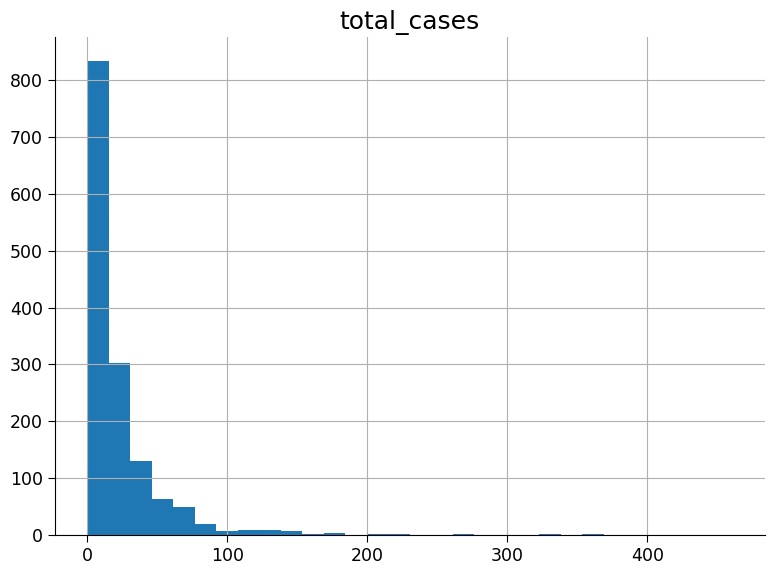

In [11]:
# to_remove solution

# display a histogram of the 'total_cases' column in the 'df_dengue' DataFrame
df_labels.hist(column='total_cases', bins = 30)

2. Plot total cases as a function of year
2. Plot total cases as a function of the week of the year
3. Plot total cases as two separate histograms, one for each of the cities with 30 bins.

In [ ]:
# creating a scatter plot of 'year' vs 'total_cases' in the DataFrame 'df_dengue'.
...

# creating a scatter plot of 'weekofyear' vs 'total_cases' in the DataFrame 'df_dengue'.
...

# creating a new DataFrame named 'new' that contains only the columns 'total_cases' and 'city' from 'df_dengue'.
new = ...

# creating histograms of the 'total_cases' column in 'new' separated by the values in the 'city' column.
new = ...

array([<Axes: title={'center': 'iq'}>, <Axes: title={'center': 'sj'}>],
      dtype=object)

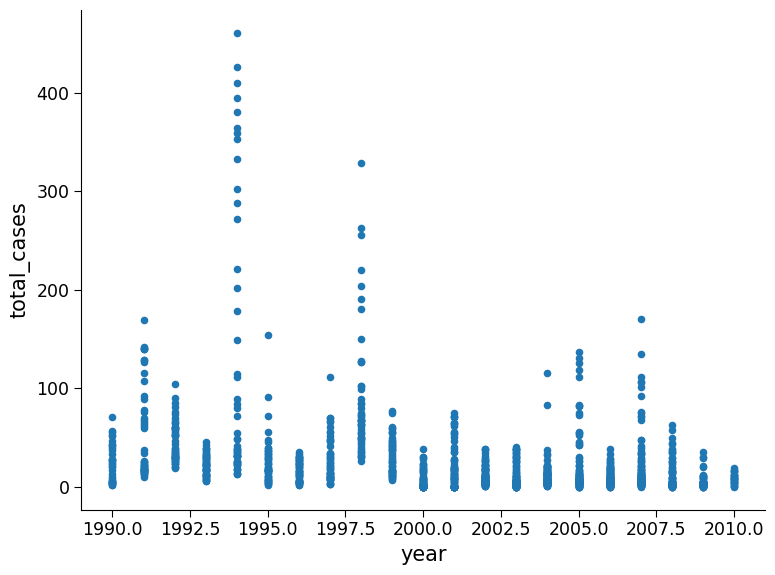

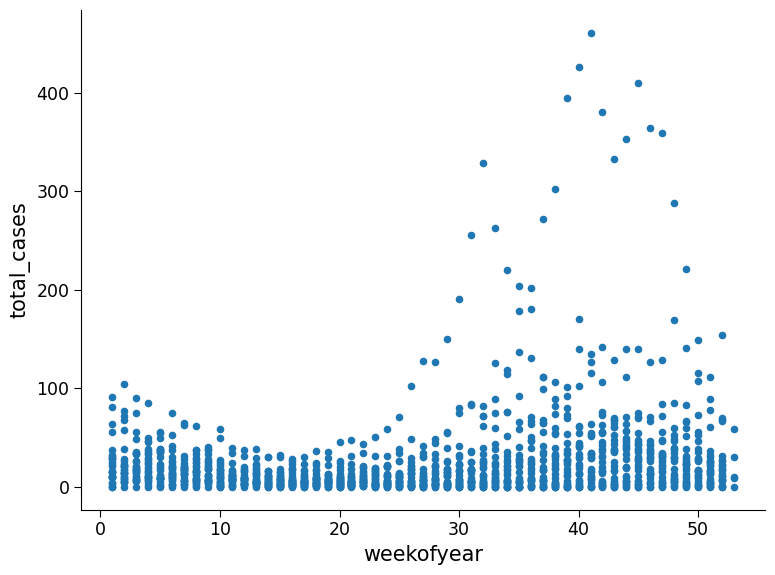

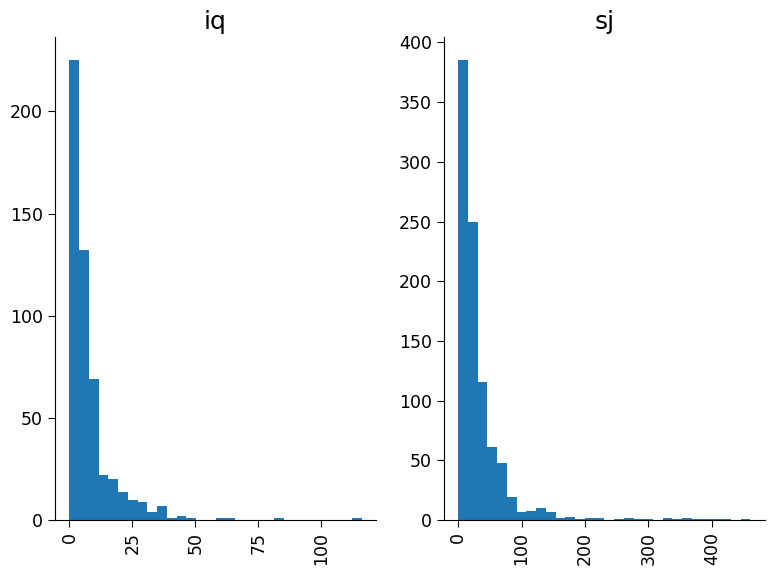

In [12]:
# to_remove solution

# creating a scatter plot of 'year' vs 'total_cases' in the DataFrame 'df_dengue'.
df_labels.plot.scatter('year','total_cases')

# creating a scatter plot of 'weekofyear' vs 'total_cases' in the DataFrame 'df_dengue'.
df_labels.plot.scatter('weekofyear','total_cases')

# creating a new DataFrame named 'new' that contains only the columns 'total_cases' and 'city' from 'df_dengue'.
new = df_labels[['total_cases','city']].copy()

# creating histograms of the 'total_cases' column in 'new' separated by the values in the 'city' column.
new.hist(by="city", bins = 30)

### Questions 1.5

1. Delve deeper into the data. What trends do you observe?
Engage in a discussion with your group and see if anyone has noticed a trend that you may have missed.


In [ ]:
# to_remove explanation
"""
1. Possible observations: In the top figure there are some years with anomously high weeks of case numbers such as 1994, 1998, and 2006. In the second figure it appears weeks with the high case numbers are consistent across years, with higher numbers appears for week of year greater than 20. In the bottom figure, the cities have comparable distribution shapes however the number of cases per week and frequency in San Juan is much higher than Iquitos.
""";


# **Section 2 : Regression on Dengue Fever Dataset**

In the previous section, we explored the Dengue dataset. In this section, we will apply linear regression to this dataset.




Since we have already explored and visualized the dataset we are ready to train a model.

We will start by preprocessing the data and defining a model to predict cases of dengue fever.

In the case of predicting dengue fever the environmental variables are the independent variables (or regressors), while number of dengue fever cases is the dependent variable that we want to predict.


## **Section 2.1: Data Preprocessing**





In climate science, data is often incomplete or missing, and it's important to handle such missing values before using the data for prediction or analysis. There are [many ways](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e) to do this. In our case, we will remove the missing values as well as columns of data we won't be using in the predictive model.



In [13]:
# data cleaning

# drop columns 'city', 'year', and 'week_start_date' from the 'df' dataframe to create a new dataframe 'df_cleaned'
df_cleaned = df_features.drop(['city','year','week_start_date'],axis=1)

# check for null and missing values
print("Null and missing value before cleaning" , df_cleaned.isnull().sum())

Null and missing value before cleaning weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
dtype: int64


In [14]:
# remove missing values (NaN). there are works in the scientific literature on how to fill the missing gaps.
# the safest method is to just remove the missing values for now.
df_cleaned = df_cleaned.dropna()

# check for null and missing values after removing
print(df_cleaned.isnull().sum())

weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64


In [15]:
df_cleaned

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


Notice that the number of rows in the dataset has decreased from 1456 to 1199. We need to ensure that the dataset with dengue cases has the same rows dropped as we just did above.

In [16]:
# use loc to select the relevant indexes
df_labels=df_labels.loc[df_cleaned.index]
df_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


To build a model with the climate data, we need to divide it into a training and test set to ensure that the model works well on held-out data. This is important because, as we have seen, evaluating the model on the exact data it was trained on can be misleading.

In [17]:
# train-test split

# select the 'total_cases' column from the 'df_dengue' dataframe and assign it to the variable 'cases'
cases = df_labels['total_cases']

# create a boolean mask with random values for each element in 'cases'
np.random.seed(145) #setting the random seed ensures we are all using the same train/test split
mask = np.random.rand(len(cases)) < 0.8   #this will use 80% of the data to train and 20% to test

# create two new dataframes from the 'df_cleaned' dataframe based on the boolean mask
df_cleaned_train = df_cleaned[mask]
df_cleaned_test = df_cleaned[~mask]

# create two new arrays from the 'cases' array based on the boolean mask
cases_train = cases[mask]
cases_test = cases[~mask]

print("80% of the data is split into the training set and remaining 20% into the test set.")

# check that this is true
print('length of training data: ',df_cleaned_train.shape[0])
print('length of test data: ',df_cleaned_test.shape[0])

80% of the data is split into the training set and remaining 20% into the test set.
length of training data:  980
length of test data:  219




## **Section 2.2: Fitting Model and Analyzing Results** 




### Coding Exercise 2.2: Implement Regression on Dengue Fever Dataset and Evaluate the Performance
For this exercise, use what you learned in the previous tutorials to train a linear regression model on the training data and evaluate its performance. Evaluate its performance on the training data and the test data. Look specifically at the difference between predicted values and true values on the test set. 

1. Train a linear regression model on the training data
2. Evaluate the performance of the model on both training and test data.
3. Look specifically at the difference between predicted values and true values on the test set.

In [ ]:
# create a new instance of the LinearRegression class
reg_model = LinearRegression()

# train the model on the training data i.e on df_cleaned_train,cases_train
_ = ...

# print the R^2 score of the trained model on the training data
print('r^2 on training data is: ')
print(...)

# print the R^2 score of the trained model on the test data
print('r^2 on test data is: ')
print(...)

fig,ax=plt.subplots()
# create a scatter plot of the predicted values vs. the actual values for the test data
...

# add 1:1 line
ax.plot(np.array(ax.get_xlim()), np.array(ax.get_xlim()), 'k-')

# add axis labels to the scatter plot
ax.set_xlabel('Actual Number of Dengue Cases')
ax.set_ylabel('Predicted Number of Dengue Cases')
ax.set_title('Predicted values vs. the actual values for the test data')

r^2 on training data is: 
0.2034827989471253
r^2 on test data is: 
0.23908670414906186


Text(0.5, 1.0, 'Predicted values vs. the actual values for the test data')

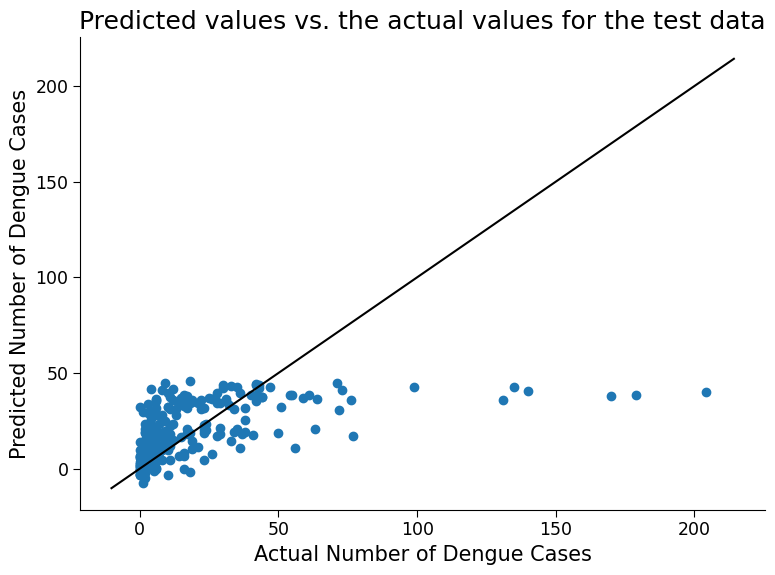

In [18]:
# to_remove solution

# create a new instance of the LinearRegression class
reg_model = LinearRegression()

# train the model on the training data i.e on df_cleaned_train,cases_train
reg_model.fit(df_cleaned_train, cases_train)

# print the R^2 score of the trained model on the training data
print('r^2 on training data is: ')
print(reg_model.score(df_cleaned_train, cases_train))

# print the R^2 score of the trained model on the test data
print('r^2 on test data is: ')
print(reg_model.score(df_cleaned_test, cases_test))

fig,ax=plt.subplots()
# create a scatter plot of the predicted values vs. the actual values for the test data
ax.scatter(cases_test,reg_model.predict(df_cleaned_test))

# add 1:1 line
ax.plot(np.array(ax.get_xlim()), np.array(ax.get_xlim()), 'k-')

# add axis labels to the scatter plot
ax.set_xlabel('Actual Number of Dengue Cases')
ax.set_ylabel('Predicted Number of Dengue Cases')
ax.set_title('Predicted values vs. the actual values for the test data')

<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>

This code trains a linear regression model on a dataset and evaluates its performance on both the training and test data.

The scatter plot generated at the end of the code shows the predicted values vs. the actual values for the test data. Each point in the scatter plot represents a single data point in the test set. The horizontal axis represents the actual number of dengue cases, while the vertical axis represents the predicted number of dengue cases.

If the predicted values are close to the actual values, the scatter plot will show a diagonal line where the points cluster around. On the other hand, if the predicted values are far from the actual values, the scatter plot will be more spread out and may show a more random pattern of points.

By visually inspecting the scatter plot and looking at the r^2, we can get an idea of how well the model is performing and how accurate its predictions are. How well does the model do?

### **Questions 2.2**

1. Discuss any surprising features of this plot related to model performance.

In [ ]:
# to_remove explanation
"""
1. Possible discussion: The model cannot predict values above 50 cases per week. This is likely due to an imbalance of data. Referencing the data exploration figures from the first section, we see that most of the data falls at or below 50 cases per week. This type of model does not excel at predicting extreme cases, and this is reflected on the plot above. Additionally, note the negative values (up to -10 cases per week) predicted by our model. It is of course not possible to have negative case numbers, however you can see that the linear regression equation does not prevent negative numbers. Later on in the bonus section you will look at a model more suitable for our dataset type that also guarantees non-negative results.
""";

We can also calculate some other metrics to assess model performance.

In [19]:
# evaluating the performance of the model using metrics such as mean absolute error (MAE) and mean squared error (MSE)

y_pred = reg_model.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('RMSE:', mean_squared_error(cases_test, y_pred,squared=False))

MAE: 15.311067947855532
RMSE: 26.02975103868102


<details>
<summary> <font color='violet'>What is MAE and MSE   </font></summary>
In addition to r^2, Mean Absolute Error (MAE) and Mean Squared Error (MSE) are both metrics used to evaluate the performance of a regression model. They both measure the difference between the predicted values and the actual values of the target variable.

The MAE is calculated by taking the average of the absolute differences between the predicted and actual values:
\begin{align}
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|
\end{align}
where $n$ is the number of samples, $y_i$ is the actual value of the target variable for sample $i$, and $\hat{y}_i$ is the predicted value of the target variable for sample $i$.

The RMSE is calculated by taking the square root of the average of the squared differences between the predicted and actual values:
\begin{align}
 RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
\end{align} 
The main difference between MAE and RMSE is that RMSE gives more weight to larger errors, because the differences are squared. Therefore, if there are some large errors in the predictions, the RMSE will be higher than the MAE.

Both MAE and RMSE have the same unit of measurement as the target variable, and lower values indicate better model performance. However, the choice of which metric to use depends on the specific problem and the goals of the model.

## **(Bonus) Section 2.3 : Handling Different Scenarios**

### **Section 2.3.1: Handling Categorical Regressors** 


We chose to remove city as a regressor because it is not a numerical value and therefore does not fit as easily into the linear regression framework. However, it is possible to include such categorical data. To do so, you need to turn the string variables representing cities into 'dummy variables', that is, numerical values that stand in for the categories. Here we can simply arbitrarily set one city to the value 0 and the other the value 1. See how including city impacts regression performance

In [20]:
df_cleaned_test

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
12,30,0.150567,0.171700,0.226900,0.214557,16.48,299.558571,299.635714,295.960000,301.8,...,42.53,80.742857,16.48,17.341429,2.071429,28.114286,6.357143,31.7,22.8,32.6
20,38,0.196350,0.182433,0.254829,0.305686,143.73,299.857143,299.900000,296.431429,301.7,...,36.60,81.637143,143.73,17.892857,1.742857,28.242857,8.114286,32.8,23.9,3.3
27,45,0.152600,0.181775,0.178329,0.186629,20.46,299.972857,300.035714,296.564286,302.2,...,14.40,81.715714,20.46,18.074286,2.385714,28.471429,8.428571,33.3,23.9,6.6
40,6,0.380100,0.228567,0.255043,0.225800,0.00,297.740000,297.928571,293.150000,299.7,...,19.69,75.794286,0.00,14.541429,2.428571,25.057143,6.885714,30.0,20.6,7.3
43,9,0.170200,0.208600,0.137520,0.191433,31.79,297.505714,297.828571,293.407143,299.8,...,23.80,77.977143,31.79,14.794286,2.114286,25.257143,7.200000,30.6,20.0,30.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,12,0.266286,0.301233,0.296000,0.295743,51.29,299.004286,300.300000,297.555714,307.9,...,214.90,93.082857,51.29,19.368571,8.028571,27.466667,9.333333,34.5,21.0,20.0
1445,15,0.157686,0.156614,0.184014,0.135886,17.33,298.305714,299.557143,297.002857,307.3,...,150.80,93.655714,17.33,18.677143,7.228571,27.150000,9.600000,33.0,21.2,18.0
1446,16,0.231486,0.294686,0.331657,0.244400,86.70,298.438571,299.507143,297.678571,304.7,...,81.40,95.995714,86.70,19.448571,7.757143,27.850000,9.600000,33.5,22.5,51.1
1447,17,0.239743,0.259271,0.307786,0.307943,26.00,299.048571,300.028571,296.468571,308.4,...,23.60,87.657143,26.00,18.068571,8.257143,28.850000,12.125000,36.2,21.4,35.4


R-squared on training data is:  0.21168850488102653
R-squared on test data is:  0.2410518841397259


Text(0.5, 1.0, 'Predicted vs Actual number of dengue cases (with city as a regressor)')

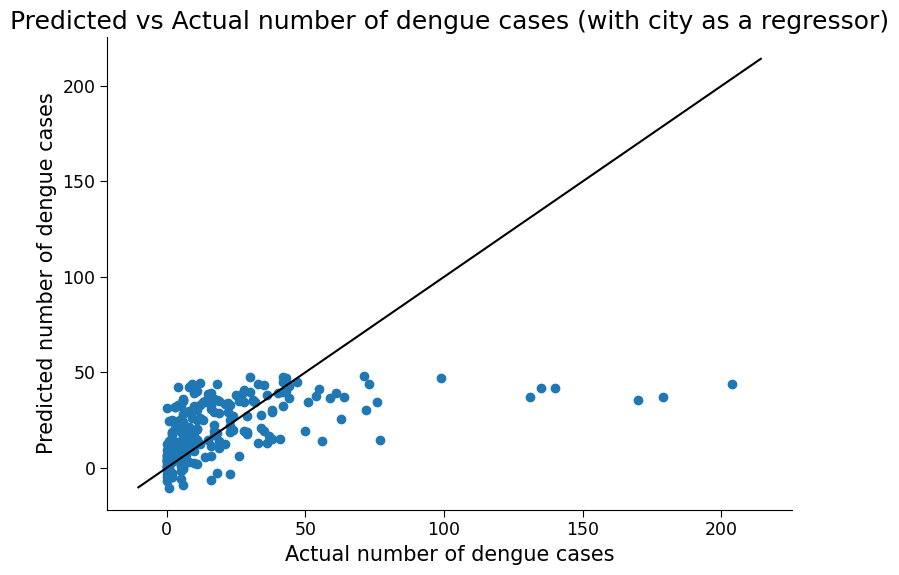

In [21]:
# include city as a regressor by creating dummy variables for the 'city' column
df_cleaned_city = pd.get_dummies(df_features.dropna()[['city']], drop_first=True)

# combine the cleaned data with the city dummy variables
df_cleaned_combined = pd.concat([df_cleaned, df_cleaned_city], axis=1)

# split the data into training and test sets using a random mask
np.random.seed(145)
mask = np.random.rand(len(cases)) < 0.8
df_cleaned_city_train = df_cleaned_combined[mask]
df_cleaned_city_test = df_cleaned_combined[~mask]
cases_city_train = cases[mask]
cases_city_test = cases[~mask]

# train a linear regression model with city as a regressor
reg_model_city = LinearRegression()
reg_model_city.fit(df_cleaned_city_train, cases_city_train)

# print R-squared scores for the train and test sets
print('R-squared on training data is: ', reg_model_city.score(df_cleaned_city_train, cases_city_train))
print('R-squared on test data is: ', reg_model_city.score(df_cleaned_city_test, cases_city_test))

fig,ax=plt.subplots()
# create a scatter plot of the predicted values vs. the actual values for the test data
ax.scatter(cases_city_test, reg_model_city.predict(df_cleaned_city_test))

# add 1:1 line
ax.plot(np.array(ax.get_xlim()), np.array(ax.get_xlim()), 'k-')

ax.set_xlabel('Actual number of dengue cases')
ax.set_ylabel('Predicted number of dengue cases')
ax.set_title('Predicted vs Actual number of dengue cases (with city as a regressor)')

<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>
The plot generated is a scatter plot with the actual total cases on the x-axis and the predicted total cases on the y-axis. Each point on the plot represents a test data point. 
The accuracy of the model can also be evaluated numerically by computing metrics such as mean absolute error (MAE) and mean squared error (MSE), as well as the R-squared score.

In [22]:
# evaluating the performance of the model using metrics such as mean absolute error (MAE) and root mean squared error (RMSE)

y_pred_city = reg_model_city.predict(df_cleaned_city_test)
print('MAE:', mean_absolute_error(cases_city_test, y_pred_city))
print('RMSE:', mean_squared_error(cases_city_test, y_pred_city, squared=False))

MAE: 15.512498624872347
RMSE: 25.996116315322112


###  **Section 2.3.2 : Handling Integer Valued Dependent Variables** 

In our simulated data from the previous tutorial, the dependent variable was real-valued and followed a normal distribution. Here, the weekly case numbers are integers and are better described by a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). Therefore, plain linear regression is not actually the most appropriate approach for this data. Rather, we should use a generalized linear model, or GLM, which is like linear regression, but includes an extra step that makes it more suited to handle Poisson data and prevent negative case numbers. Try to use [scikit-learn's Poisson GLM method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html) on this data. Evaluate the performance of this model using the same metrics as above. 

r^2 on training data is: 
0.32673162286972757
r^2 on test data is: 
0.3703581602386913


/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Text(0, 0.5, 'Predicted Cases')

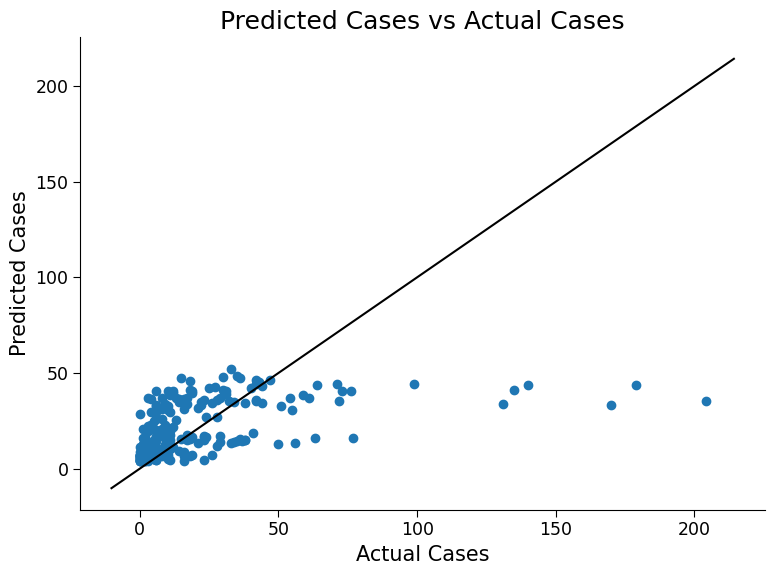

In [23]:
# create PoissonRegressor object
poisson_reg = PoissonRegressor()

# fit the PoissonRegressor model with training data
poisson_reg.fit(df_cleaned_train, cases_train)

# calculate r^2 score on training data
print('r^2 on training data is: ')
print(poisson_reg.score(df_cleaned_train, cases_train))

# calculate r^2 score on test data
print('r^2 on test data is: ')
print(poisson_reg.score(df_cleaned_test, cases_test))

fig,ax=plt.subplots()
# plot predicted values against test data
ax.scatter(cases_test, poisson_reg.predict(df_cleaned_test))

# add 1:1 line
ax.plot(np.array(ax.get_xlim()), np.array(ax.get_xlim()), 'k-')

# add plot title and labels
ax.set_title("Predicted Cases vs Actual Cases")
ax.set_xlabel("Actual Cases")
ax.set_ylabel("Predicted Cases")


<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>
The plot generated is a scatter plot with the actual total cases on the x-axis and the predicted total cases on the y-axis. Each point on the plot represents a test data point.

In [24]:
# evaluating the performance of the model using metrics such as mean absolute error (MAE) and root mean squared error (RMSE)

y_pred = poisson_reg.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('RMSE:', mean_squared_error(cases_test, y_pred, squared=False))

MAE: 14.981738501611318
RMSE: 25.98838208958701


### **Question 2.3: Performance of the Model**

Engage in discussion with your pod to share your observations from the additional changes above.
- What did you observe?
- Reflect on how different factors may affect the performance of the model.
- Brainstorm as a group additional ways to improve the model's performance.


In [ ]:
# to_remove explanation
"""
Possible discussion: In terms of a 1:1 truth versus prediction, both models still struggle to predict case numbers larger than 50. However R-squared values do increase, especially for the Poisson model, and there is a slight impact on the other error metrics. Note also, as mentioned, the Possion model does not predict negative case values.
""";


# **Section 3: Decision Trees** 


In the field of climate science, decision trees and random forests can be powerful tools for making predictions and analyzing complex data.

A decision tree is a type of model that is constructed by recursively splitting the data based on the values of the input features. Each internal node in the tree represents a decision based on the value of a feature, and each leaf node represents a prediction. Decision trees are easy to interpret and can capture complex, nonlinear relationships in the data.

Random forests are a type of ensemble model that combines multiple decision trees to make predictions. Each tree in the forest is trained on a random subset of the data, and the final prediction is the average of the predictions from all the trees. Random forests are particularly useful in climate science because they can handle high-dimensional data with many features and can capture both linear and nonlinear relationships.

By using decision trees and random forests, climate scientists can make accurate predictions about a variety of climate-related variables, such as temperature, precipitation, and sea-level rise. They can also gain insights into the complex relationships between different variables and identify important features that contribute to these relationships.

 By training a Random Forest Model in this tutorial, we can better understand the relationship between climate variables and dengue fever cases, and potentially improve our ability to predict and prevent outbreaks.


## **Section 3.1: Fitting Model and Analyzing Results** 


Next, you will train a random forest regression model using scikit-learn's RandomForestRegressor class, with default hyperparameters. Use the documentation of the method [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to help you if needed. Evaluate the model's performance on the training and test data and make a scatter plot of predicted vs actual cases for the test data. 
Use `RandomForestRegressor()` which we already imported.

In [ ]:
# train a random forest regression model

# use the RandomForestRegressor we imported earlier
rf = ...

# run fit on 'df_cleaned_train' and 'cases_train'
_ = ...

# evaluate the model's performance on the training and testing data
# calculate accuracy by calling rf.score() on 'df_cleaned_train' and 'cases_train'
print('R^2 on training data is: ')
print(...)

print('R^2 on test data is: ')
print(...)

fig,ax=plt.subplots()
# plot the predicted vs. actual total cases on the test data
...

# add 1:1 line
ax.plot(np.array(ax.get_xlim()), np.array(ax.get_xlim()), 'k-')

ax.set_xlabel('Actual Total Cases')
ax.set_ylabel('Predicted Total Cases')
ax.set_title('Random Forest Regression')


R^2 on training data is: 
0.8943123539693705
R^2 on test data is: 
0.3757169197847854


Text(0.5, 1.0, 'Random Forest Regression')

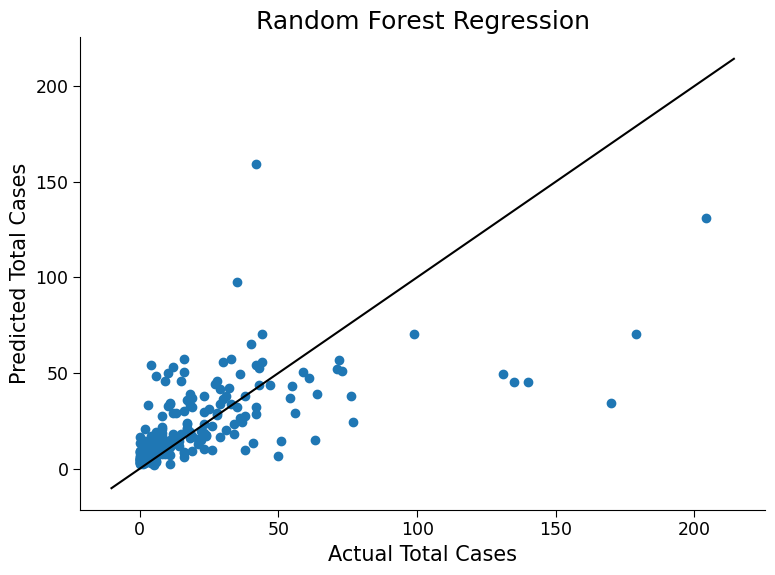

In [27]:
# to_remove solution

# train a random forest regression model

# use the RandomForestRegressor we imported earlier
rf = RandomForestRegressor()

# run fit on 'df_cleaned_train' and 'cases_train'
_ = rf.fit(df_cleaned_train, cases_train)

# evaluate the model's performance on the training and testing data
# calculate accuracy by calling rf.score() on 'df_cleaned_train' and 'cases_train'
print('R^2 on training data is: ')
print(rf.score(df_cleaned_train, cases_train))

print('R^2 on test data is: ')
print(rf.score(df_cleaned_test, cases_test))


fig,ax=plt.subplots()
# plot the predicted vs. actual total cases on the test data
ax.scatter(cases_test, rf.predict(df_cleaned_test))

# add 1:1 line
ax.plot(np.array(ax.get_xlim()), np.array(ax.get_xlim()), 'k-')

ax.set_xlabel('Actual Total Cases')
ax.set_ylabel('Predicted Total Cases')
ax.set_title('Random Forest Regression')


<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>
The plot generated is a scatter plot with the actual total cases on the x-axis and the predicted total cases on the y-axis. Each point on the plot represents a test data point. 

In [28]:
# evaluating the performance of the model using metrics such as mean absolute error (MAE) and root mean squared error (MSE)

y_pred = rf.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('RMSE:', mean_squared_error(cases_test, y_pred, squared=False))

MAE: 13.224794520547947
RMSE: 23.577253346021156


### Question 3.1: Reflecting on the Performance 
Please think and discuss the following questions with your pod members:

1. How does the performance of the random forest model compare to that of the linear regression model?
2. How does the performance on the test data compare to the performance on the training data?
3. What could be the reason behind performing well on the training data but poorly on the test data? Hint: Look up 'overfitting'

In [ ]:
#  to_remove explanation
"""
1. The random forest model generally performs better than the linear regression model as it can capture non-linear relationships between features and target.
2. The low performance of the model on the test set might be due to the model learning the noise in the training data instead of the underlying patterns.
3. Overfitting is the term for good training performance but poor test performance, where the model fits the training data too closely and fails to generalize to new data.
4. Solutions to handle overfitting include reducing model complexity, increasing dataset size, using regularization, or cross-validation. Ensemble models such as random forests also do inherently help control overfitting by averaging many different models
""";


## **Section 3.2: Looking at Feature Importance**

When we train a model to predict an outcome, it's important to understand which inputs to the model are most important in driving that prediction. This is where 'feature importance' methods come in.

One way to measure feature importance is by using the permutation method. This involves randomly shuffling the values of a feature and testing the performance of the model with these permuted values. The amount that the model performance decreases when the feature's values are permuted can provide an indication of how important it is.

For climate scientists, understanding feature importance can help identify key variables that contribute to predicting important outcomes, such as temperature or precipitation patterns.

Thankfully, Sci-kit learn has a method that implements permutation importance, and outputs a normalized measure of how much each feature impacts performance.

In [33]:
# execute this cell to enable the plotting function to be used for plotting performance of our model in next cell: `plot_feature_importance`

def plot_feature_importance(perm_feat_imp):
    # increase the size of the plot for better readability
    fig,ax=plt.subplots(figsize=(12, 8))

    # plot the feature importance with error bars in navy blue color
    ax.errorbar(np.arange(len(df_cleaned.columns)), perm_feat_imp['importances_mean'], perm_feat_imp['importances_std'], fmt='o', capsize=5, markersize=5, color='navy')

    # set the x-axis and y-axis labels and title
    ax.set_xlabel('Features', fontsize=14)
    ax.set_ylabel('Importance', fontsize=14)
    ax.set_title('Feature Importance Plot', fontsize=16)

    # rotate the x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=12)

    # add gridlines for better visualization
    ax.grid(True, axis='y', linestyle='--')

    # bar plot
    ax.bar(np.arange(len(df_cleaned.columns)), perm_feat_imp['importances_mean'], color='navy')


/tmp/ipykernel_904/2763166810.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=12)


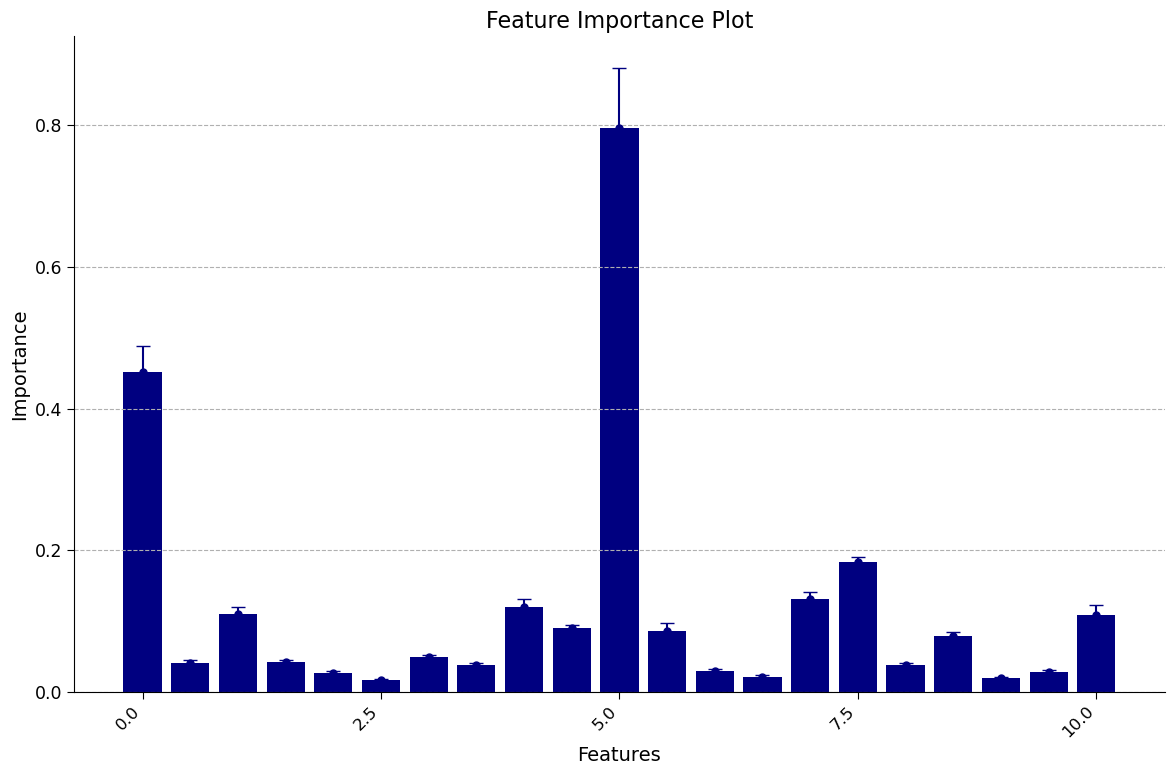

In [34]:
# Plot the feature importance of each input to the model

# Use permutation_importance to calculate the feature importances of the trained random forest model
# df_cleaned_train contains the preprocessed training dataset, cases_train contains the actual number of dengue fever cases in the training dataset
# n_repeats specifies how many times the feature importances are calculated for each feature
# random_state is used to seed the random number generator for reproducibility
perm_feat_imp = permutation_importance(rf, df_cleaned_train, cases_train,
                           n_repeats=10,
                           random_state=0)

# Create a plot of the feature importances
plot_feature_importance(perm_feat_imp)

<details>
<summary> <font color='orangered'>Click here for description of plot </font></summary>

The plot generated is a feature importance plot that provides insights into the importance of different features in predicting the target variable. Let's break down the key elements and address the specific issues raised.

1. Feature Importance Representation:
- Each bar in the plot represents a feature from the dataset.
- The height of each bar represents the relative feature importance value.
- Specifically, importance is measured as the decrease in performance that comes from permuting that feature.
- Negative values typically indicate that the model performed better if the feature was removed.

2. Error Bars and Variability:
- The error bars present around each feature's bar represent the variability in importance values.
- They indicate the uncertainty or variability in the importance estimates calculated through repeated permutations.
- A longer error bar suggests higher variability, meaning the importance value for that feature may change significantly with different permutations.
- Conversely, a shorter error bar indicates lower variability, indicating that the importance value is relatively stable and less influenced by random permutations.

Understanding the feature importance plot empowers us to identify the most influential factors within our dataset. By recognizing these crucial features, we gain deeper insights into the underlying relationships within climate science data. This knowledge is invaluable for further analysis and informed decision-making processes within our field.

It's important to note that the interpretation of feature importance can vary depending on the dataset and modeling technique employed. To gain a comprehensive understanding of feature importance analysis in the context of climate science, it is advisable to consult domain experts and explore additional resources tailored to your specific interests.

By delving into the world of feature importance, we unlock the potential to unravel the intricate dynamics of our climate science data and make meaningful contributions to this fascinating field of study.

 </summary>

### **Question 3.2: Climate Connection**
Please think and discuss the following questions with your pod members:

1. Which features were most important? Why do you suspect they would be?
2. Which features were not? Are there other variables not included here you think that would be more relevant than those that were deemed 'not important'?

In [ ]:
# to_remove explanation
"""
1. The plot above shows that the min_air_temp (minimum air temperature) has the highest importance score, followed by week of year and tdtr (diurnal temperature range). Warmer environments are more conducive to mosquito populations, and the week of year may be important due to the season.
2. Surprisingly, these results suggest that some of the precipitation variables were not very helpful. One variable that might be more relevant to mosquito populatoins is an esimate of standing water.
""";


## **(Bonus) Section 3.3: Comparing Feature Importance Methods**

The Random Forest Regression model also has a built-in estimation of feature importance. This estimation comes directly from how the decision trees are trained; specifically, it is a measure of how useful the feature is at splitting the data averaged across all nodes and trees. We can access these values directly from the trained model.

Different methods of estimating feature importance can come to different conclusions and may have different biases. Therefore, it is good to compare estimations across methods. How do these two methods compare? 

/tmp/ipykernel_904/2002728510.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=12)


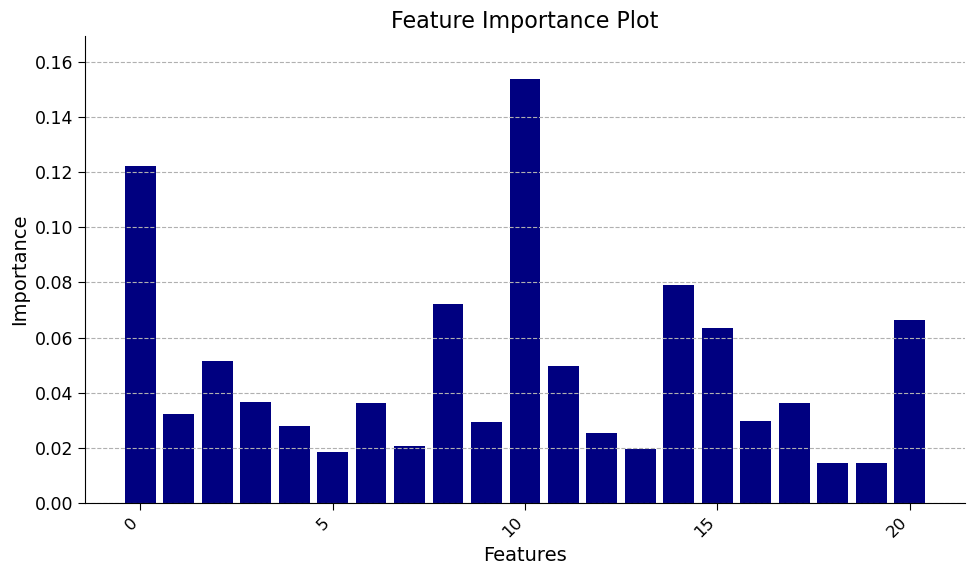

In [35]:
# set the figure size for better readability
fig,ax=plt.subplots(figsize=(10, 6))

# create a bar chart of the feature importances returned by the random forest model
ax.bar(np.arange(len(rf.feature_importances_)), rf.feature_importances_, color='navy')

# set the x-axis and y-axis labels and title
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)
ax.set_title('Feature Importance Plot', fontsize=16)

# rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=12)

# set the y-axis limit to better visualize the differences in feature importance
ax.set_ylim(0, rf.feature_importances_.max() * 1.1)

# add gridlines for better visualization
ax.grid(True, axis='y', linestyle='--')



<details>
<summary> <font color='orangered'>Click here for description of plot </font></summary>

The bar chart displays the feature importances returned by the random forest model. Each bar represents the relative importance of each feature in predicting the number of dengue fever cases in the preprocessed dataset. The y-axis represents the importance of the features, while the x-axis displays the name of the features.

### **Question 3.3: Climate Connection**
Please think and discuss the following questions with your pod members:

1. How does this compare to the feature importance figure calculated using the permuation method above?
2. Do the differences agree more or less with your own expectations of which variables would be most important?

In [ ]:
# to_remove explanation
"""
1. Unlike the previous estimate of importance, here week of year, temperature variables and precipitation and humidity are all important. This underpins the importance of using multiple methods for estimating feature importance.
2. The important features with the built-in method shown here agree likely more with expectations: hot and humid environments are both supportive of mosquito populations. Note: we have used the training data to evaluate feature importance (this is mandatory for the built-in method); different results may come from using the test data.
""";

# **Summary**

In this tutorial, you explored various methods of analyzing the Dengue Fever dataset from a climate science perspective. You started by using pandas to handle the data and visualizing trends and anomalies. Next, you applied linear regression to model the data and handle categorical and integer-valued data. Finally, you applied random forest regression to improve the performance of the model and learned about feature importance. Overall, learners gained practical experience in using different modeling techniques to analyze and make predictions about real-world climate data. 



# Extra Exercises or Project Ideas

1. Try experimenting with different hyperparameters for the random forest model, such as n_estimators, max_depth, and min_samples_leaf. How do these hyperparameters affect the performance of the model? 

2. Try using a different machine learning algorithm to predict the number of Dengue fever cases, such as a support vector machine. How does the performance of these algorithms compare to the random forest model?

3. Try using a different dataset to predict the number of cases of a different disease or health condition. How does the preprocessing and modeling process differ for this dataset compared to the Dengue fever dataset?

4. Try visualizing the decision tree of the random forest model using the plot_tree function of the sklearn package. What insights can you gain from the visualization of the decision tree?


# **Resources**

Data from this tutorial can be accessed [here](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/81/).